In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('udemy_output_All_Finance__Accounting_p1_p626.csv')

In [4]:
col_names=['discount_price__amount','price_detail__amount']   

median_fill={col:df[col].median() for col in col_names}
  
df.fillna(median_fill,inplace=True)

In [5]:
duplicates=df[df.duplicated()]
print(duplicates)
duplicates.shape


Empty DataFrame
Columns: [id, title, url, is_paid, num_subscribers, avg_rating, avg_rating_recent, rating, num_reviews, is_wishlisted, num_published_lectures, num_published_practice_tests, created, published_time, discount_price__amount, discount_price__currency, discount_price__price_string, price_detail__amount, price_detail__currency, price_detail__price_string]
Index: []


(0, 20)

In [6]:
col_curr=['price_detail__currency','discount_price__currency']
for col in col_curr:
    df.fillna({col:'INR'},inplace=True)

In [7]:
df.drop(['url','discount_price__price_string','price_detail__price_string','discount_price__currency','price_detail__currency'],inplace=True,axis=1)

In [8]:
df['created']=pd.to_datetime(df['created'])
df['published_time']=pd.to_datetime(df['published_time'])

In [9]:
# converted in to dollars
df['discount_price__amount']=df['discount_price__amount']*(1/82)
df['price_detail__amount']=df['price_detail__amount']*(1/82)

In [10]:
#calculated discount percentage
df['discount percentage']=((df['price_detail__amount']-df['discount_price__amount'])/df['price_detail__amount'])*100

In [11]:
#change the title heading lower cases,extra space,replacing with white spaces
df['title']=df['title'].str.lower()
df['title']=df['title'].str.strip().replace(r'\s+','',regex=True)
df['title']=df['title'].str.replace(r'[^\w\s]','',regex=True)

In [12]:
#categorizing courses based on keywords
def categorize_title(title):
    title_lower = title.lower()

    if 'sql' in title_lower or 'mysql' in title_lower or 'database' in title_lower:
        return 'Database'
    elif 'tableau' in title_lower or 'power bi' in title_lower or 'data viz' in title_lower:
        return 'Data Visualization'
    elif 'excel' in title_lower or 'spreadsheet' in title_lower:
        return 'Spreadsheet'
    elif any(kw in title_lower for kw in ['agile', 'scrum', 'pmp', 'project management']):
        return 'Project Management'
    elif any(kw in title_lower for kw in ['financial', 'finance', 'accounting']):
        return 'Finance'
    elif any(kw in title_lower for kw in ['mba', 'business', 'enterprise']):
        return 'Business'
    elif any(kw in title_lower for kw in ['write', 'writing', 'editorial']):
        return 'Writing'
    elif 'sale' in title_lower or 'marketing' in title_lower:
        return 'Sales/Marketing'
    elif any(kw in title_lower for kw in ['data science', 'analytics', 'machine learning']):
        return 'Data Science'
    elif 'management' in title_lower:
        return 'Management'
    elif 'leadership' in title_lower:
        return 'Leadership'
    elif 'communication' in title_lower:
        return 'Communication'
    else:
        return 'Other'


In [13]:
df['course_category'] = df['title'].apply(categorize_title)

print(df[['title', 'course_category']].head(10))


                                               title     course_category
0         thecompletesqlbootcamp2020gofromzerotohero            Database
1  tableau2020azhandsontableautrainingfordatascience  Data Visualization
2                      pmpexamprepseminarpmbokguide6  Project Management
3              thecompletefinancialanalystcourse2020             Finance
4  anentirembain1courseawardwinningbusinessschool...            Business
5   microsoftpowerbiacompleteintroduction2020edition               Other
6  agilecrashcourseagileprojectmanagementagiledel...  Project Management
7  beginnertoproinexcelfinancialmodelingandvaluation         Spreadsheet
8       becomeaproductmanagerlearntheskillsgetthejob               Other
9           thebusinessintelligenceanalystcourse2020            Business


In [14]:
df['course_category'].value_counts()

course_category
Other                 8737
Business              1468
Finance               1125
Management             632
Sales/Marketing        522
Spreadsheet            268
Writing                260
Project Management     258
Data Visualization      80
Leadership              72
Communication           71
Data Science            68
Database                47
Name: count, dtype: int64

In [ ]:
## Popular courses by subscribers and number of reviews

In [275]:
pop_course=df.groupby(['title','is_paid','course_category'])['num_subscribers'].max().reset_index().sort_values(by='num_subscribers',ascending=False)
print(pop_course.head(10))

                                                   title  is_paid  \
878    anentirembain1courseawardwinningbusinessschool...        1   
12076         thecompletesqlbootcamp2020gofromzerotohero        1   
11311                   stockmarketinvestingforbeginners        0   
11984              thecompletefinancialanalystcourse2020        1   
3561    deeplearningprerequisitesthenumpystackinpythonv2        1   
11572  tableau2020azhandsontableautrainingfordatascience        1   
11985  thecompletefinancialanalysttraininginvestingco...        1   
12050  thecompletepresentationandpublicspeakingspeech...        1   
9502                       pmpexamprepseminarpmbokguide6        1   
6959   introductiontofinanceaccountingmodelingandvalu...        1   

          course_category  num_subscribers  
878              Business           374836  
12076            Database           295509  
11311               Other           259888  
11984             Finance           245860  
3561           

In [276]:
highreview_course=df.groupby(['title','is_paid','course_category'])['num_reviews'].max().reset_index().sort_values(by='num_reviews',ascending=False)
print(highreview_course.head(10))

                                                   title  is_paid  \
12076         thecompletesqlbootcamp2020gofromzerotohero        1   
11572  tableau2020azhandsontableautrainingfordatascience        1   
9502                       pmpexamprepseminarpmbokguide6        1   
11984              thecompletefinancialanalystcourse2020        1   
878    anentirembain1courseawardwinningbusinessschool...        1   
8631    microsoftpowerbiacompleteintroduction2020edition        1   
626    agilecrashcourseagileprojectmanagementagiledel...        1   
1432   beginnertoproinexcelfinancialmodelingandvaluation        1   
1354        becomeaproductmanagerlearntheskillsgetthejob        1   
11903           thebusinessintelligenceanalystcourse2020        1   

          course_category  num_reviews  
12076            Database        78006  
11572  Data Visualization        54581  
9502   Project Management        52653  
11984             Finance        46447  
878              Business        41

In [ ]:
## Trend of courses overtime

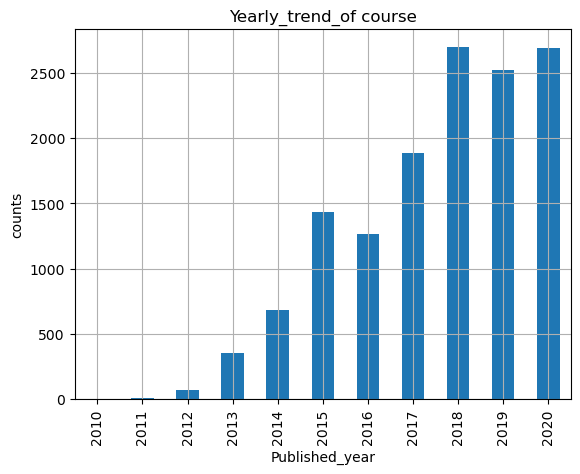

In [278]:
df['months']=df['published_time'].dt.month
df['year']=df['published_time'].dt.year
monthly_trend=df['months'].value_counts().sort_index()
yearly_trend=df['year'].value_counts().sort_index()

yearly_trend.plot(kind='bar')
plt.title('Yearly_trend_of course')
plt.xlabel('Published_year')
plt.ylabel('counts')
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

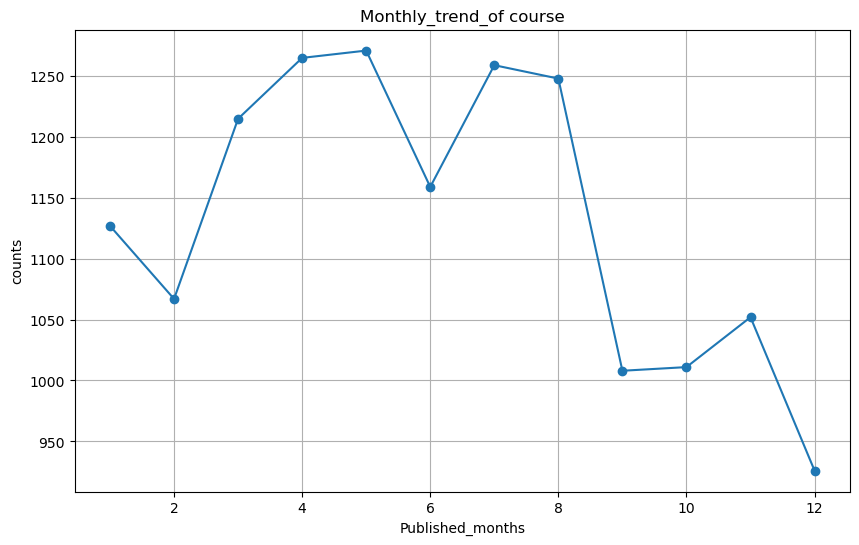

In [279]:
plt.figure(figsize=(10,6))
monthly_trend.plot(kind='line',marker='o')
plt.title('Monthly_trend_of course')
plt.xlabel('Published_months')
plt.ylabel('counts')
plt.grid(True)
plt.show

In [15]:
df['Months']=df['published_time'].dt.month
df['Years']=df['published_time'].dt.year
df['is_paid']=df['is_paid'].astype(int)
df['is_wishlisted']=df['is_wishlisted'].astype(int)


In [281]:
df.head()

,id,title,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,...,Years,course_age,course_month_age,course_year_age,high_review,review_per_sub,price_x_rating,lectures_x_reviews,months,year
0,762616,thecompletesqlbootcamp2020gofromzerotohero,1,295509,4.66019,4.67874,4.67874,78006,0,84,...,2016,3354,111,9,1,0.263972,491.024898,6552504,4,2016
1,937678,tableau2020azhandsontableautrainingfordatascience,1,209070,4.58956,4.60015,4.60015,54581,0,78,...,2016,3214,107,8,1,0.261066,483.582907,4257318,8,2016
2,1361790,pmpexamprepseminarpmbokguide6,1,155282,4.59491,4.59326,4.59326,52653,0,292,...,2017,2766,92,7,1,0.339080,484.146615,15374676,11,2017
3,648826,thecompletefinancialanalystcourse2020,1,245860,4.54407,4.53772,4.53772,46447,0,338,...,2016,3430,114,9,1,0.188916,478.789815,15699086,1,2016
4,637930,anentirembain1courseawardwinningbusinessschool...,1,374836,4.47080,4.47173,4.47173,41630,0,83,...,2016,3439,114,9,0,0.111062,471.069659,3455290,1,2016


# Comparing engagement by paid and unpaid courses

In [46]:
engagement=df.groupby('is_paid')[['num_subscribers','avg_rating','avg_rating_recent','rating']].mean().reset_index()
engagement['course_type']=engagement['is_paid'].map({0:'Free',1:'paid'})
engagement.drop('is_paid',axis=1,inplace=True)
print(engagement)

   num_subscribers  avg_rating  avg_rating_recent    rating course_type
0      5861.286290    3.960125           3.994254  3.994254        Free
1      2732.986577    3.921900           3.909139  3.909139        paid


In [53]:
expensive_course=df.groupby(['title','is_paid','course_category'])['discount_price__amount'].max().reset_index().sort_values(by='discount_price__amount',ascending=False)
print(expensive_course.head(10))

                                                   title  is_paid  \
2938   costosdeproducciónparagenerarmayoresgananciase...        1   
7436   kostenrechnungundkalkulationfürhotelleriegastr...        1   
7962                           level2quantitativemethods        1   
12051   thecompletepriceactioncourseadvancedforextrading        1   
771                             amazoncopywritingmastery        1   
10392                                resultscoachmastery        1   
85               2020managerguidetoperformancemanagement        1   
11912                               thebuyerpresentation        1   
2343                   certifiedmanagerofqualitytraining        1   
9912            projectfinancemodelingforrenewableenergy        1   

      course_category  discount_price__amount  
2938      Spreadsheet                39.02439  
7436            Other                39.02439  
7962            Other                39.02439  
12051           Other                39.02439  


In [55]:
expensive_course=df.groupby(['title','is_paid','course_category'])['price_detail__amount'].max().reset_index().sort_values(by='price_detail__amount',ascending=False)
print(expensive_course.head(10))

                                                   title  is_paid  \
8297     masterclasshowtoprofitablytradecryptoaltseasons        1   
955                 appliedpetroleumreservoirengineering        1   
11051        speaklikeapropublicspeakingforprofessionals        1   
183       6stepstogrowyourmachinequiltingservicebusiness        1   
13490                                              實戰選飆股        1   
2513   coachingcoursepracticalguidetoquickbooksonline...        1   
12109         thecryptocradletradingstrategybytradercobb        1   
4366                                 excelvba教你製作台灣股市資料庫        1   
2512                    coachingcourseinvestmentplanning        1   
101          20lessonsilearnedindentalbusinessmanagement        1   

      course_category  price_detail__amount  
8297            Other            156.097561  
955             Other            156.097561  
11051           Other            156.097561  
183          Business            156.097561  
13490     

In [59]:
expensive_course=df.groupby(['course_category'])[['num_reviews','rating']].mean().reset_index()
print(expensive_course.head(10))

      course_category  num_reviews    rating
0            Business   218.393733  4.079829
1       Communication   575.915493  4.124029
2        Data Science   325.147059  4.098696
3  Data Visualization  1250.662500  4.151812
4            Database  2699.191489  4.293385
5             Finance   249.762667  3.683116
6          Leadership   498.888889  4.159961
7          Management   286.178797  4.065553
8               Other   200.472588  3.864287
9  Project Management   690.364341  4.114946


In [ ]:
# MODEL to predict number of subscribers and average rating

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   id                            13608 non-null  int64              
 1   title                         13608 non-null  object             
 2   is_paid                       13608 non-null  int32              
 3   num_subscribers               13608 non-null  int64              
 4   avg_rating                    13608 non-null  float64            
 5   avg_rating_recent             13608 non-null  float64            
 6   rating                        13608 non-null  float64            
 7   num_reviews                   13608 non-null  int64              
 8   is_wishlisted                 13608 non-null  int32              
 9   num_published_lectures        13608 non-null  int64              
 10  num_published_practice_tests  1360

In [63]:
X=df[['course_category','discount percentage','discount_price__amount','price_detail__amount','num_reviews','is_paid','avg_rating','num_published_lectures','num_published_practice_tests','is_wishlisted',]]
y=df['num_subscribers']
print(X.shape)
print(y.shape)

(13608, 9)
(13608,)


In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10886, 9)
(10886,)
(2722, 9)
(2722,)


In [65]:
cat_cols=X.select_dtypes(include='object').columns.tolist()
num_cols=X.select_dtypes(include='number').columns.tolist()

In [72]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_cols),
        ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_cols)
    ]
)

clf=ImbPipeline(steps=[
    ('preprocessor',preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=1000,random_state=42))
])
        

In [73]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(mean_squared_error(y_pred,y_test))
print(r2_score(y_pred,y_test))

36323335.52271109
0.4244534774330019


In [ ]:
# poor performance of above model

## feature engineering

In [16]:
df['published_time'] = pd.to_datetime(df['published_time'], errors='coerce').dt.tz_localize(None)

df['course_age']=(pd.Timestamp.today() - df['published_time']).dt.days
df['course_month_age']=df['course_age']//30
df['course_year_age']=df['course_age']//365


In [17]:
df['high_review']=(df['rating']>=4.5).astype(int)

In [81]:
df.head()

,id,title,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,...,discount_price__amount,price_detail__amount,discount percentage,course_category,Months,Years,course_age,course_month_age,course_year_age,high_review
0,762616,thecompletesqlbootcamp2020gofromzerotohero,1,295509,4.66019,4.67874,4.67874,78006,0,84,...,5.54878,105.365854,94.733796,Database,4,2016,3354,111,9,1
1,937678,tableau2020azhandsontableautrainingfordatascience,1,209070,4.58956,4.60015,4.60015,54581,0,78,...,5.54878,105.365854,94.733796,Data Visualization,8,2016,3214,107,8,1
2,1361790,pmpexamprepseminarpmbokguide6,1,155282,4.59491,4.59326,4.59326,52653,0,292,...,5.54878,105.365854,94.733796,Project Management,11,2017,2766,92,7,1
3,648826,thecompletefinancialanalystcourse2020,1,245860,4.54407,4.53772,4.53772,46447,0,338,...,5.54878,105.365854,94.733796,Finance,1,2016,3430,114,9,1
4,637930,anentirembain1courseawardwinningbusinessschool...,1,374836,4.47080,4.47173,4.47173,41630,0,83,...,5.54878,105.365854,94.733796,Business,1,2016,3439,114,9,0


In [ ]:
# new model after feature engineering

In [83]:
X=df[['course_category','discount percentage','discount_price__amount','price_detail__amount','num_reviews','is_paid','avg_rating','num_published_lectures','num_published_practice_tests','is_wishlisted','course_age','high_review'
]]
y=df['num_subscribers']
print(X.shape)
print(y.shape)

(13608, 12)
(13608,)


In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10886, 12)
(10886,)
(2722, 12)
(2722,)


In [85]:
cat_cols=X.select_dtypes(include='object').columns.tolist()
num_cols=X.select_dtypes(include='number').columns.tolist()

In [86]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_cols),
        ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_cols)
    ]
)

clf=ImbPipeline(steps=[
    ('preprocessor',preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=1000,random_state=42))
])
        

In [87]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(mean_squared_error(y_pred,y_test))
print(r2_score(y_pred,y_test))

34710732.78198618
0.4610191188894449


In [ ]:
# outliers detection and checking the distribution of numeric feature

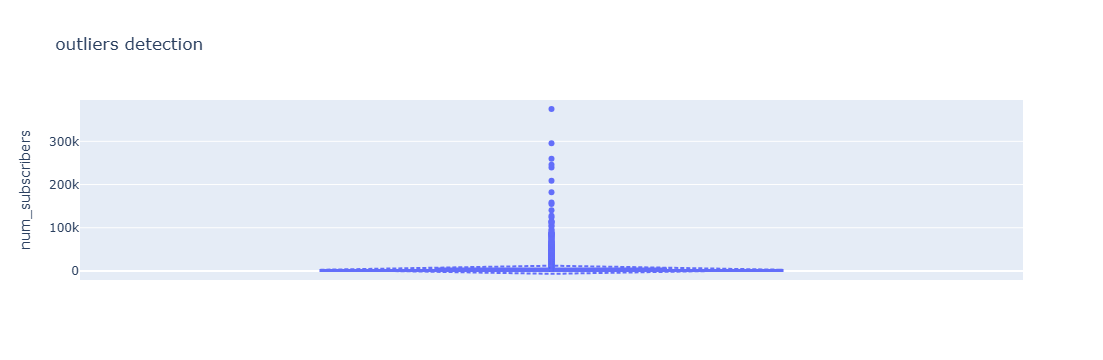

In [173]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
numeric_features=df.select_dtypes(include=['float64','int64','int32']).columns
fig=px.box(df,y='num_subscribers',title='outliers detection')
fig.update_traces(boxmean='sd')
fig.show()

In [ ]:
# using log in target variable to reduce skewness and make it normally distributed

In [151]:
X=df[['discount percentage','discount_price__amount','price_detail__amount','num_reviews','is_paid','avg_rating','num_published_lectures','num_published_practice_tests','is_wishlisted','course_age','high_review'
]]
y=df['num_subscribers']
print(X.shape)
print(y.shape)

(13608, 11)
(13608,)


In [152]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10886, 11)
(10886,)
(2722, 11)
(2722,)


In [153]:
cat_cols=X.select_dtypes(include='object').columns.tolist()
num_cols=X.select_dtypes(include='number').columns.tolist()

In [154]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_cols),
        ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_cols)
    ]
)

clf=ImbPipeline(steps=[
    ('preprocessor',preprocessor),
        ('regressor', LinearRegression())
])
      

In [155]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(mean_squared_error(y_pred,y_test))
print(r2_score(y_pred,y_test))

38863642.36284652
0.5201059600336528


In [ ]:
# predicting the 'finance' num_subscribers

In [161]:
Finance_df=df[df['course_category']=='Finance']
x=Finance_df[['course_category','discount percentage','discount_price__amount','price_detail__amount','num_reviews','is_paid','avg_rating','num_published_lectures','num_published_practice_tests','is_wishlisted','course_age','high_review'
]]
y=Finance_df['num_subscribers']
print(x.shape)
print(y.shape)

(1125, 12)
(1125,)


In [162]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(900, 12)
(900,)
(225, 12)
(225,)


In [166]:
cat_col=X.select_dtypes(include='object').columns.tolist()
num_col=X.select_dtypes(include='number').columns.tolist()

In [168]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_col),
        ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_col)
    ]
)
model=ImbPipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())
])
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(mean_squared_error(y_pred,y_test))
print(r2_score(y_pred,y_test))

28159479.204063546
0.49321216414532243


In [171]:
subscriber_eachcourse=df.groupby(['course_category'])['num_subscribers'].max().reset_index().sort_values(by='num_subscribers',ascending=False)
print(subscriber_eachcourse.head(10))

       course_category  num_subscribers
0             Business           374836
4             Database           295509
8                Other           259888
5              Finance           245860
3   Data Visualization           209070
9   Project Management           155282
11         Spreadsheet           127680
12             Writing           102727
10     Sales/Marketing            85960
6           Leadership            68148


In [ ]:
# feature engineering

In [18]:
df['review_per_sub'] = df['num_reviews'] / (df['num_subscribers'] + 1e-6)

In [19]:
#feature interaction
df['price_x_rating'] = df['price_detail__amount'] * df['avg_rating']
df['lectures_x_reviews'] = df['num_published_lectures'] * df['num_reviews']


In [180]:
Finance_df=df[df['course_category']=='Finance']
x=Finance_df[['course_category','discount percentage','lectures_x_reviews','price_x_rating','review_per_sub','discount_price__amount','price_detail__amount','num_reviews','is_paid','avg_rating','num_published_lectures','num_published_practice_tests','is_wishlisted','course_age','high_review'
]]
y=Finance_df['num_subscribers']
print(x.shape)
print(y.shape)

(1125, 15)
(1125,)


In [181]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(900, 15)
(900,)
(225, 15)
(225,)


In [182]:
cat_col=X.select_dtypes(include='object').columns.tolist()
num_col=X.select_dtypes(include='number').columns.tolist()

In [183]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_col),
        ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_col)
    ]
)
model=ImbPipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())
])
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(mean_squared_error(y_pred,y_test))
print(r2_score(y_pred,y_test))

28159479.204063546
0.49321216414532243


In [ ]:
#checking outliers in num_Subsribers and working on it to improve model performance

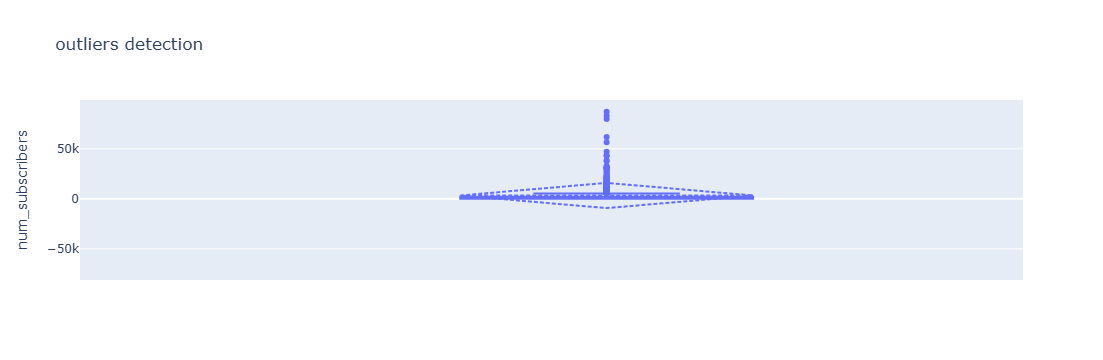

In [184]:
finance_df=df[df['course_category']=='Finance']
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
numeric_features=df.select_dtypes(include=['float64','int64','int32']).columns
fig=px.box(financedf,y='num_subscribers',title='outliers detection')
fig.update_traces(boxmean='sd')
fig.show()

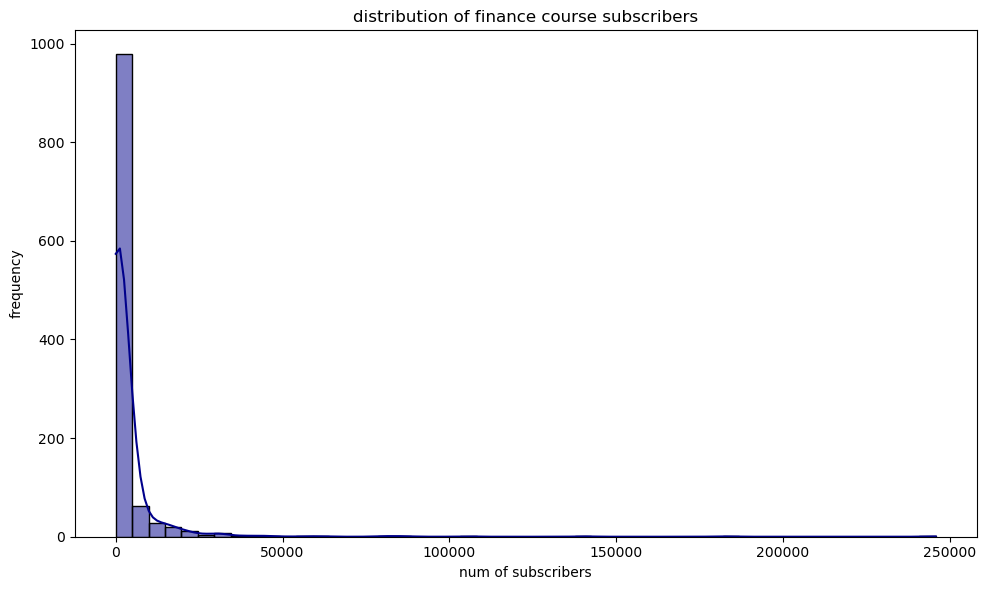

3351.263111111111
11.527146051943996


In [190]:
from scipy.stats import skew
plt.figure(figsize=(10,6))
sns.histplot(finance_df['num_subscribers'],bins=50,kde=True,color='darkblue')
plt.title('distribution of finance course subscribers')
plt.xlabel('num of subscribers')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()
mean=finance_df['num_subscribers'].mean()
print(mean)
skew_value=skew(finance_df['num_subscribers'].dropna())
print(skew_value)

In [ ]:
# using log after detecting outliers in target variable

In [192]:
Finance_df=df[df['course_category']=='Finance']
x=Finance_df[['course_category','discount percentage','lectures_x_reviews','price_x_rating','review_per_sub','discount_price__amount','price_detail__amount','num_reviews','is_paid','avg_rating','num_published_lectures','num_published_practice_tests','is_wishlisted','course_age','high_review'
]]
y=np.log1p(Finance_df['num_subscribers'])
print(x.shape)
print(y.shape)

(1125, 15)
(1125,)


In [191]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(900, 15)
(900,)
(225, 15)
(225,)


In [193]:
cat_col=X.select_dtypes(include='object').columns.tolist()
num_col=X.select_dtypes(include='number').columns.tolist()

In [201]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_col),
        ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_col)
    ]
)
log_model=ImbPipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())
])
log_model.fit(x_train,y_train)
y_pred_log=log_model.predict(x_test)
y_pred_log = np.clip(y_pred_log, a_min=0, a_max=14)
y_pred=np.expm1(y_pred_log)
y_pred = np.nan_to_num(y_pred, nan=0.0, posinf=1e6, neginf=0.0)
y_test_actual=np.expm1(y_test)
# Check for any invalid values
print("🔍 Any NaNs in y_pred?", np.isnan(y_pred).any())
print("🔍 Any Infs in y_pred?", np.isinf(y_pred).any())
print("🔍 Max y_pred:", np.max(y_pred))

print(mean_squared_error(y_pred,y_test))
print(r2_score(y_pred,y_test))

🔍 Any NaNs in y_pred? False
🔍 Any Infs in y_pred? False
🔍 Max y_pred: 1202603.2841647768
1265801261968.7822
-7.28813535667161


C:\Users\91952\.InstallAnywhere\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

overflow encountered in expm1



In [ ]:
#poor performance of model with very high mse and negative r2 overfitting the model(LOG TRANSFORMATION )

In [265]:
#excluding the outliers
Finance_df=df[df['course_category']=='Finance'].copy()
finance_df['rank'] = finance_df['num_subscribers'].rank(pct=True)
lower= finance_df['num_subscribers'].quantile(0.01)
upper = finance_df['num_subscribers'].quantile(0.99)
finance_df = finance_df[(finance_df['num_subscribers'] > lower) & (finance_df['num_subscribers'] < upper)]
x=finance_df[['course_category','discount percentage','lectures_x_reviews','price_x_rating','review_per_sub','discount_price__amount','price_detail__amount','num_reviews','is_paid','avg_rating','num_published_lectures','num_published_practice_tests','is_wishlisted','course_age','high_review'
]]
y=np.log1p(finance_df['num_subscribers'])

print(x.shape)
print(y.shape)

(346, 15)
(346,)


In [266]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(276, 15)
(276,)
(70, 15)
(70,)


In [267]:
cat_col=X.select_dtypes(include='object').columns.tolist()
num_col=X.select_dtypes(include='number').columns.tolist()

In [268]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_col),
        ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_col)
    ]
)
log_model=ImbPipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())
])
log_model.fit(x_train,y_train)
y_pred_log=log_model.predict(x_test)
y_pred_log = np.clip(y_pred_log, a_min=0, a_max=14)
y_pred=np.expm1(y_pred_log)
y_pred = np.nan_to_num(y_pred, nan=0.0, posinf=1e6, neginf=0.0)
y_test_actual=np.expm1(y_test)
# Check for any invalid values
print("🔍 Any NaNs in y_pred?", np.isnan(y_pred).any())
print("🔍 Any Infs in y_pred?", np.isinf(y_pred).any())
print("🔍 Max y_pred:", np.max(y_pred))

print(mean_squared_error(y_pred,y_test))
print(r2_score(y_pred,y_test))

🔍 Any NaNs in y_pred? False
🔍 Any Infs in y_pred? False
🔍 Max y_pred: 3559.022592576846
242211.2707725597
-0.13881498109780543


✅ Evaluation after outlier trimming and log transform
📉 MSE: 21564081.90
📈 R² Score: -0.1079


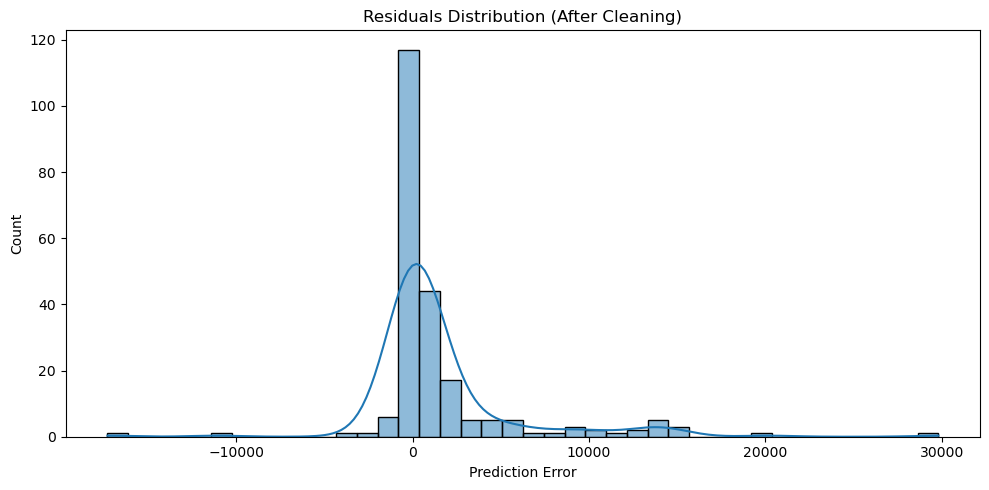

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Filter Finance courses
finance_df = df[df['course_category'] == 'Finance'].copy()

# Step 2: Add percentile rank based on num_subscribers
finance_df['rank'] = finance_df['num_subscribers'].rank(pct=True)

# Step 3: Keep only the middle 98% (exclude top/bottom 1%)
filtered_df = finance_df[(finance_df['rank'] > 0.01) & (finance_df['rank'] < 0.99)].copy()
filtered_df.drop(columns='rank', inplace=True)

# Step 4: Define features and log-transformed target
X = filtered_df[['discount percentage', 'discount_price__amount', 'price_detail__amount',
                 'num_reviews', 'is_paid', 'avg_rating',
                 'num_published_lectures', 'num_published_practice_tests']]

y = np.log1p(filtered_df['num_subscribers'])

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Preprocessing pipeline
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=np.number).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
])

# Step 7: Linear Regression pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Step 8: Train model
model.fit(X_train, y_train)

# Step 9: Predict and invert log
y_pred_log = model.predict(X_test)
y_pred_log = np.clip(y_pred_log, a_min=0, a_max=14)  # optional safety cap
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

# Step 10: Evaluate
mse = mean_squared_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print("✅ Evaluation after outlier trimming and log transform")
print(f"📉 MSE: {mse:.2f}")
print(f"📈 R² Score: {r2:.4f}")

# Step 11: Plot residuals
residuals = y_test_actual - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Residuals Distribution (After Cleaning)")
plt.xlabel("Prediction Error")
plt.tight_layout()
plt.show()


In [ ]:
# none of the above work except simple linear model ,using categorical num subscribers

In [23]:
# Step 1: Filter Finance category
finance_df = df[df['course_category'] == 'Finance'].copy()

# Step 2: Create quantile-based classes
finance_df['subscriber_class'] = pd.qcut(finance_df['num_subscribers'], q=3, labels=['Low', 'Medium', 'High'])

# Optional check
print(finance_df['subscriber_class'].value_counts())


subscriber_class
Low       375
Medium    375
High      375
Name: count, dtype: int64


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target
X = finance_df[['course_category','discount percentage','lectures_x_reviews','price_x_rating','review_per_sub','discount_price__amount','price_detail__amount','num_reviews','is_paid','avg_rating','num_published_lectures','num_published_practice_tests','is_wishlisted','course_age','high_review'
]]

y = finance_df['subscriber_class']
print(X.shape)
print(y.shape)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# Preprocessing
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include='number').columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
])

# Random Forest Classifier pipeline
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'))
])


(1125, 15)
(1125,)
(900, 15)
(900,)
(225, 15)
(225,)


In [25]:
# Train model
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

print("🧩 Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


📊 Classification Report:

              precision    recall  f1-score   support

        High       0.97      0.93      0.95        75
         Low       0.92      0.97      0.95        75
      Medium       0.91      0.89      0.90        75

    accuracy                           0.93       225
   macro avg       0.93      0.93      0.93       225
weighted avg       0.93      0.93      0.93       225

🧩 Confusion Matrix:

[[70  0  5]
 [ 0 73  2]
 [ 2  6 67]]


In [272]:
# Extract feature importances
ohe = clf.named_steps['preprocessor'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(cat_cols)
all_features = num_cols + list(ohe_features)
importances = clf.named_steps['classifier'].feature_importances_

# Display top features
feat_imp = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
print(feat_imp.head(10))


                   Feature  Importance
6              num_reviews    0.247616
3           review_per_sub    0.235206
1       lectures_x_reviews    0.178269
12              course_age    0.072962
2           price_x_rating    0.067885
8               avg_rating    0.059240
9   num_published_lectures    0.054986
0      discount percentage    0.031542
5     price_detail__amount    0.024389
7                  is_paid    0.014927


📊 Classification Report:

              precision    recall  f1-score   support

         Low       0.97      0.93      0.95        75
      Medium       0.92      0.97      0.95        75
        High       0.91      0.89      0.90        75

    accuracy                           0.93       225
   macro avg       0.93      0.93      0.93       225
weighted avg       0.93      0.93      0.93       225



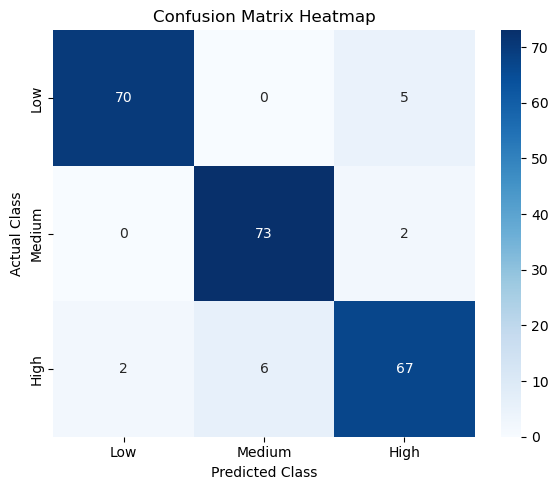

In [273]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix values
cm = np.array([
    [70,  0,  5],   # Actual Low
    [ 0, 73,  2],   # Actual Medium
    [ 2,  6, 67]    # Actual High
])

# Flatten to compute metrics
y_true = (
    [0]*75 +  # 70 correct, 5 wrong
    [1]*75 +  # 73 correct, 2 wrong
    [2]*75    # 67 correct, 8 wrong
)

y_pred = (
    [0]*70 + [2]*5 +    # Low
    [1]*73 + [2]*2 +    # Medium
    [2]*67 + [0]*2 + [1]*6   # High
)

# Labels
labels = ['Low', 'Medium', 'High']

# Precision, Recall, F1
print("📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels, digits=2))

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
# making new predictions 

In [32]:
# Example: A new course sample (single row)
new_course = pd.DataFrame({
    'discount percentage': [50],
    'discount_price__amount': [999],
    'price_detail__amount': [1999],
    'num_reviews': [1200],
    'is_paid': [1],
    'avg_rating': [4.6],
    'num_published_lectures': [80],
    'num_published_practice_tests': [5],
    'lectures_x_reviews': [60 * 800],  # 48000
    'review_per_sub': [800 / (45000 + 1e-6)],  # safe division
    'price_x_rating': [999 * 4.5],  # 4495.5
    'is_wishlisted': [1],
    'course_category': ['Finance'],
    'course_age': [365],  # e.g., 1 year old
    'high_review':[1]

})
# Predict the class
predicted_class = clf.predict(new_course)[0]

# Predict class probabilities (optional)
class_probs = clf.predict_proba(new_course)

# Display
print(f"📘 Predicted Subscriber Class: {predicted_class}")
print("\n📊 Prediction Probabilities:")
for label, prob in zip(clf.named_steps['classifier'].classes_, class_probs[0]):
    print(f"{label}: {prob:.4f}")


📘 Predicted Subscriber Class: High

📊 Prediction Probabilities:
High: 0.6950
Low: 0.0300
Medium: 0.2750
